<a href="https://colab.research.google.com/github/shivang915/BCS_109/blob/master/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day1/Day1_Data.csv")

# check the dataset uploaded as expected
print("The number of observations in the dataset: {}".format(plant_df.shape))
df.head()




The number of observations in the dataset: (9568, 5)


,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [8]:
df.describe()

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
df.agg(['skew','kurt','sem'])

,T,V,AP,RH,EP
skew,-0.136393,0.198521,0.265445,-0.431839,0.306509
kurt,-1.037549,-1.444337,0.094237,-0.444526,-1.048521
sem,0.076189,0.129916,0.060714,0.149262,0.174480


In [10]:
from scipy import stats as bob  
for col in df.columns:
  a = bob.hmean(df[col])
  b = bob.gmean(df[col])
  print(col + ':\t' + str(a) + '\t' + str(b))

T:	15.96072079292619	17.95937222625265
V:	51.38438409398994	52.82358194949038
AP:	1013.2243258257025	1013.2416934519393
RH:	69.87838140238046	71.69111290023949
EP:	453.73054434330743	454.04664374024685


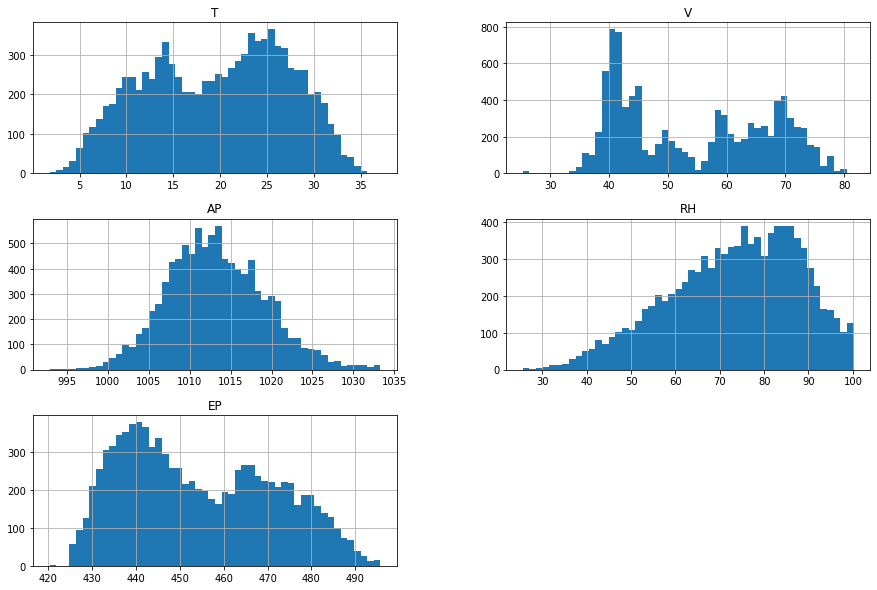

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,10))
plt.show()

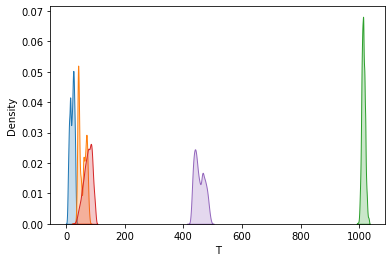

In [12]:
import seaborn as sns

for col in df:
    sns.kdeplot(df[col], shade=True)

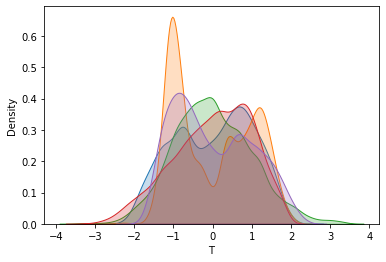

In [13]:
normalized_df=(df-df.mean())/df.std()
for col in df:
    sns.kdeplot(normalized_df[col], shade=True)


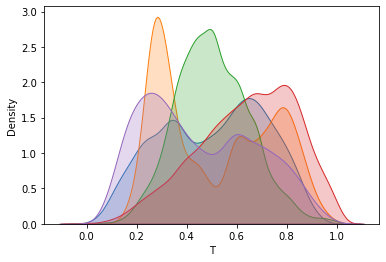

In [15]:
min_max_df=(df-df.min())/(df.max()-df.min())
for col in df:
    sns.kdeplot(min_max_df[col], shade=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/pyth

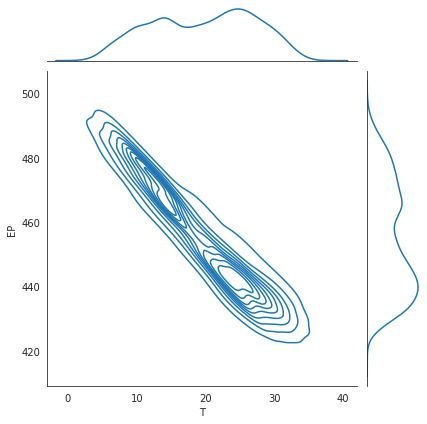

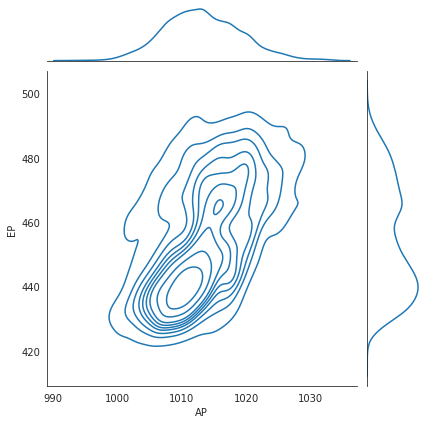

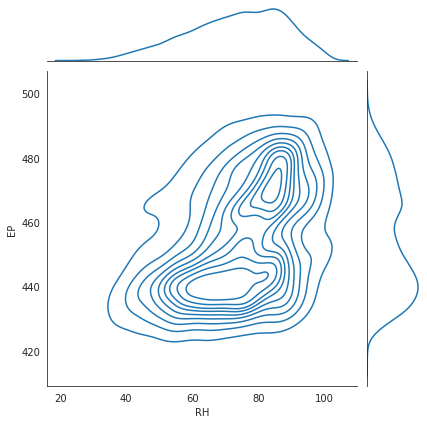

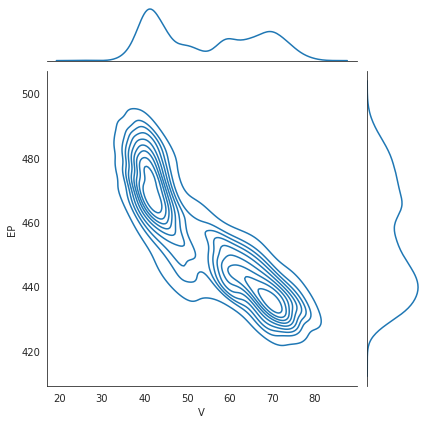

In [16]:
with sns.axes_style('white'):
    sns.jointplot("T", "EP", df, kind='kde')
    sns.jointplot("AP", "EP", df, kind='kde')
    sns.jointplot("RH", "EP", df, kind='kde')
    sns.jointplot("V", "EP", df, kind='kde')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/pyth

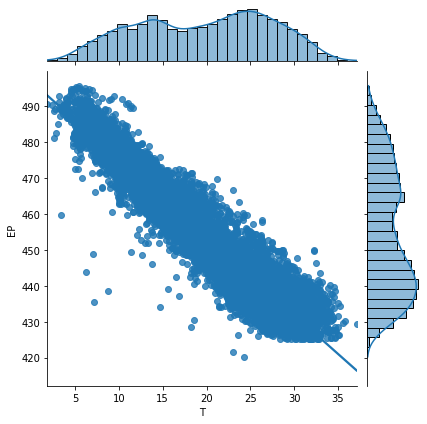

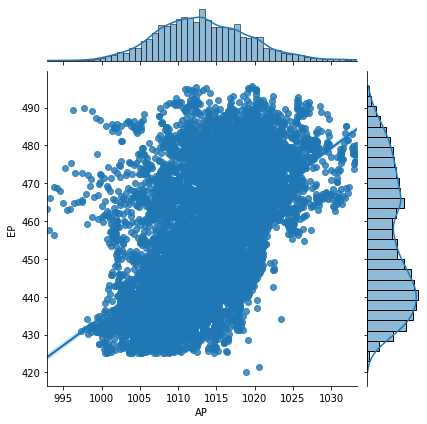

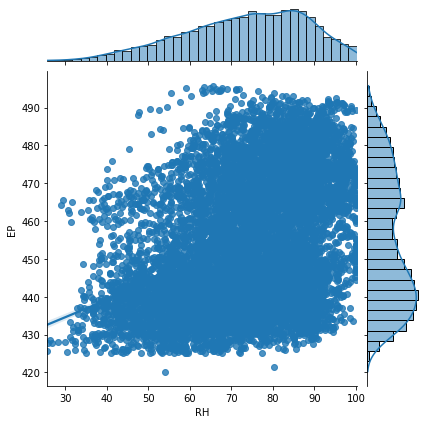

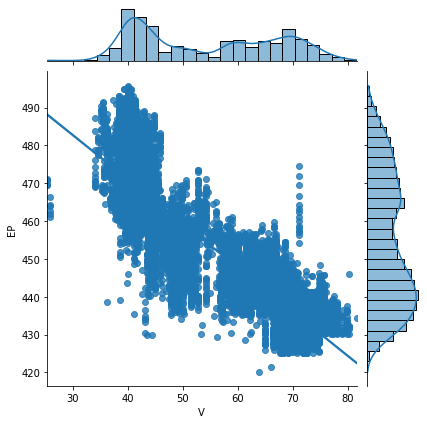

In [18]:
def do_jointplot(df):
  a = sns.jointplot("T","EP",df,kind = "reg")
  b = sns.jointplot("AP","EP",df,kind = "reg")
  c= sns.jointplot("RH","EP",df,kind = "reg")
  d = sns.jointplot("V","EP",df,kind = "reg")

do_jointplot(df)


In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# load the entire dataset from a file uploaded to my GitHub repo
df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv")

#create a second stored value of original data as a safety
df_orignal = df

# check the dataset uploaded as expected
print("Observations: {}".format(df.shape[0]))
df.head()

Observations: 12795


,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [26]:
df.describe()

,CasesSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [ ]:
df.isnull().sum()

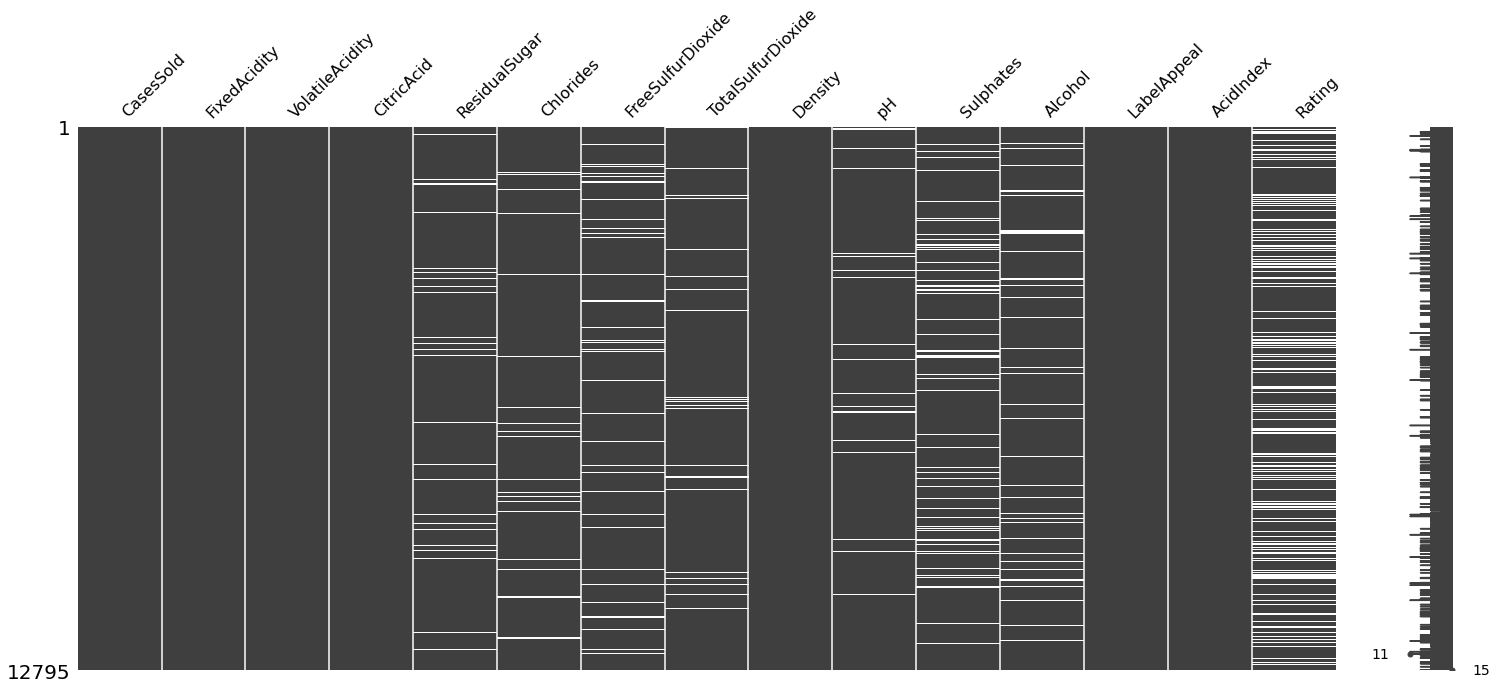

In [28]:
ax = msno.matrix(df)


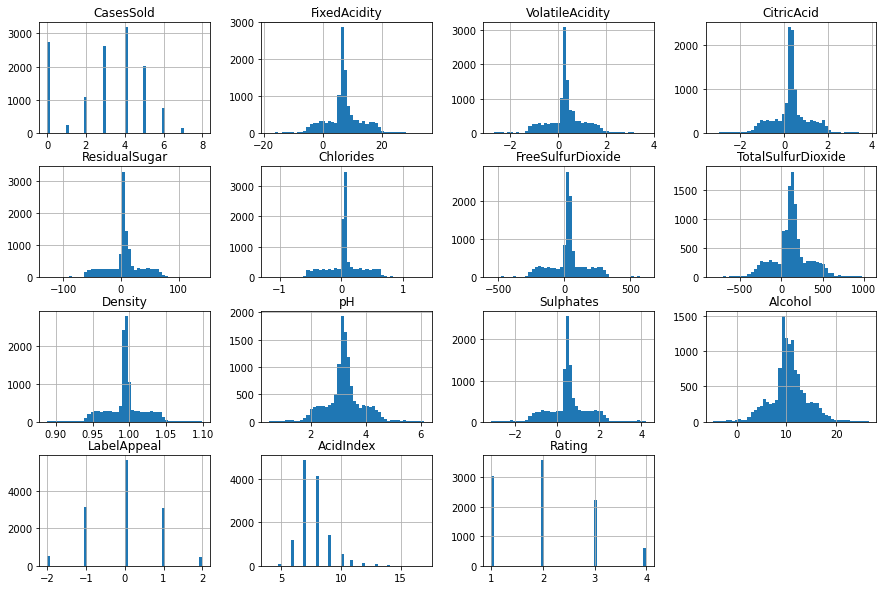

In [29]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(15,10))
plt.show()

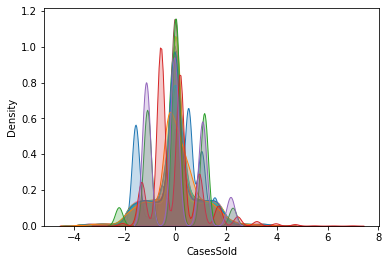

In [31]:
normalized_df=(df-df.mean())/df.std()
for col in df:
    sns.kdeplot(normalized_df[col], shade=True)


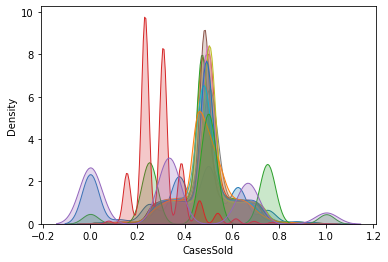

In [32]:
min_max_df=(df-df.min())/(df.max()-df.min())
for col in df:
    sns.kdeplot(min_max_df[col], shade=True)

In [ ]:
corrMatrix = df.corr()
corrMatrix

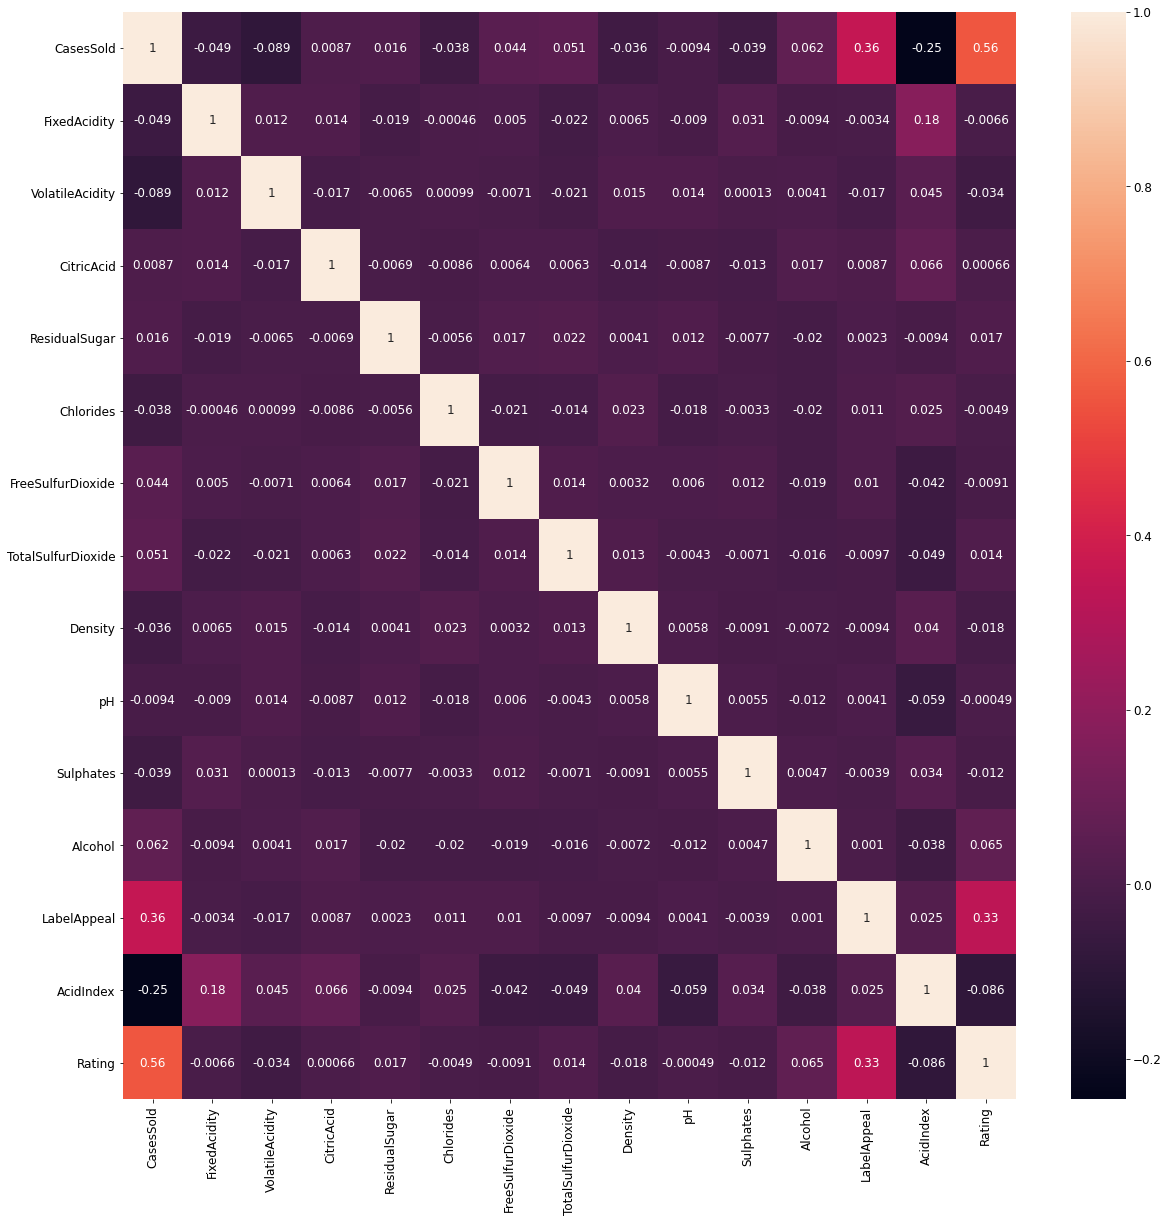

In [34]:
plt.rcParams.update({'font.size': 12,'figure.figsize':(20,20)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() 